In [1]:
pip install numpy scipy matplotlib pandas

Mean Aggregate Loss: 614,781.81
99% VaR: 987,223.73
99% Expected Shortfall: 1,093,511.76


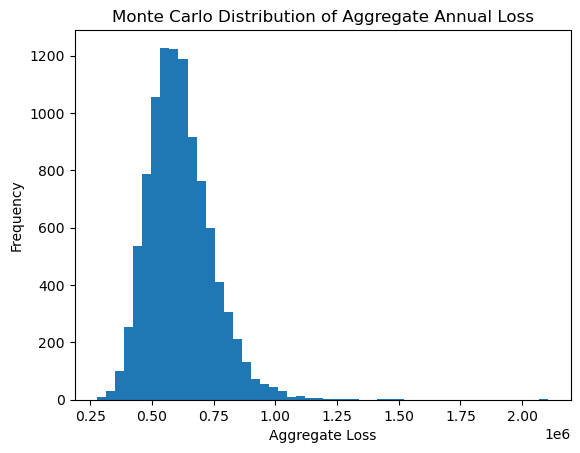

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Model Parameters
# -----------------------------

lambda_claims = 100        # Average annual number of claims
mu_lognormal = 8           # Mean of log severity
sigma_lognormal = 1.2      # Std dev of log severity
n_simulations = 10000      # Number of Monte Carlo runs

# -----------------------------
# Monte Carlo Simulation
# -----------------------------

aggregate_losses = []

for _ in range(n_simulations):
    
    # Step 1: Simulate number of claims
    n_claims = np.random.poisson(lambda_claims)
    
    # Step 2: If claims occur, simulate severities
    if n_claims > 0:
        severities = np.random.lognormal(mu_lognormal, sigma_lognormal, n_claims)
        total_loss = np.sum(severities)
    else:
        total_loss = 0
    
    aggregate_losses.append(total_loss)

aggregate_losses = np.array(aggregate_losses)

# -----------------------------
# Risk Measures
# -----------------------------

mean_loss = np.mean(aggregate_losses)
var_99 = np.percentile(aggregate_losses, 99)
expected_shortfall_99 = aggregate_losses[aggregate_losses >= var_99].mean()

print(f"Mean Aggregate Loss: {mean_loss:,.2f}")
print(f"99% VaR: {var_99:,.2f}")
print(f"99% Expected Shortfall: {expected_shortfall_99:,.2f}")

# -----------------------------
# Plot Distribution
# -----------------------------

plt.hist(aggregate_losses, bins=50)
plt.title("Monte Carlo Distribution of Aggregate Annual Loss")
plt.xlabel("Aggregate Loss")
plt.ylabel("Frequency")
plt.show()